In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [2]:
# Construct the gene-gene interaction matrix J
xi1 = np.array([ 1, 1, 1,-1,-1,-1,-1,-1,-1])
xi2 = np.array([-1,-1,-1, 1, 1, 1,-1,-1,-1])
#xi3 = np.array([-1,-1,-1,-1,-1,-1, 1, 1, 1])

#xi = np.stack((xi1, xi2, xi3), axis=-1)
xi = np.stack((xi1, xi2), axis=-1)
Jhat = xi@np.linalg.inv(xi.T@xi)@xi.T
J = Jhat #- np.diag(np.diag(Jhat))
#LA.eig(J)

# Verify the lowest energy state in a single cell
S = np.stack(np.meshgrid([-1, 1], [-1, 1], [-1, 1], [-1, 1],[-1, 1], [-1, 1], [-1, 1], [-1, 1], [-1, 1]), -1).reshape(-1, 9).T
H = np.diag(-S.T@J@S/2)

xi_low = S[:,np.where(np.absolute(H - H.min())<1e-6)]
print("There are ",xi_low[0,0,:].shape,"global min.")
print("The lowest energy states/global min. are the row vectors of matrix\n",xi_low.T)

There are  (4,) global min.
The lowest energy states/global min. are the row vectors of matrix
 [[[-1 -1 -1  1  1  1 -1 -1 -1]]

 [[-1 -1 -1  1  1  1  1  1  1]]

 [[ 1  1  1 -1 -1 -1 -1 -1 -1]]

 [[ 1  1  1 -1 -1 -1  1  1  1]]]


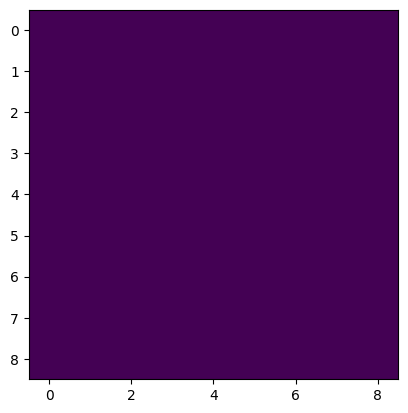

In [3]:
plt.imshow(Jhat - Jhat.T)

In [4]:
np.diag(np.diag(Jhat))

array([[0.167, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.167, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.167, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.167, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.167, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.167, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.333, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.333, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.333]])

# Construct $J_{ij}$ for some choice of pattern vectors

In [5]:
xi_1 = [1,   1,  1, -1, -1, -1, -1, -1, -1]
xi_2 = [-1, -1, -1,  1,  1,  1, -1, -1, -1]
xi_3 = [-1, -1, -1, -1, -1, -1,  1,  1 , 1]
xi_matrix = np.array([xi_1, xi_2, xi_3]).T
print(xi_matrix)

[[ 1 -1 -1]
 [ 1 -1 -1]
 [ 1 -1 -1]
 [-1  1 -1]
 [-1  1 -1]
 [-1  1 -1]
 [-1 -1  1]
 [-1 -1  1]
 [-1 -1  1]]


In [6]:
N, p = xi_matrix.shape
print(N, p)

9 3


In [7]:
A_matrix = xi_matrix.T @ xi_matrix
print(A_matrix)

[[ 9 -3 -3]
 [-3  9 -3]
 [-3 -3  9]]


In [8]:
A_inverse = np.linalg.inv(A_matrix)
print(A_inverse)

[[0.167 0.083 0.083]
 [0.083 0.167 0.083]
 [0.083 0.083 0.167]]


In [9]:
J_matrix = xi_matrix @ A_inverse @ xi_matrix.T
print(J_matrix)

[[0.333 0.333 0.333 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.333 0.333 0.333 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.333 0.333 0.333 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.333 0.333 0.333 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.333 0.333 0.333 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.333 0.333 0.333 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.333 0.333 0.333]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.333 0.333 0.333]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.333 0.333 0.333]]


In [10]:
J_matrix_hollowed = J_matrix - np.diag(np.diag(J_matrix))
print(J_matrix_hollowed)

[[0.000 0.333 0.333 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.333 0.000 0.333 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.333 0.333 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.333 0.333 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.333 0.000 0.333 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.333 0.333 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.333 0.333]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.333 0.000 0.333]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.333 0.333 0.000]]


# Eigenvalues and eigenvectors for $\bf{J}$

In [11]:
w, v = np.linalg.eig(J_matrix)

In [12]:
w

array([1.000, -0.000, -0.000, 1.000, -0.000, -0.000, 1.000, 0.000, -0.000])

In [13]:
v

array([[0.577, -0.000, 0.496, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.577, -0.707, -0.810, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.577, 0.707, 0.314, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.577, -0.000, 0.496, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.577, -0.707, -0.810, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.577, 0.707, 0.314, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.577, -0.000, 0.784],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.577, -0.707, -0.590],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.577, 0.707, -0.194]])

In [14]:
J_matrix @ xi_1

array([1.000, 1.000, 1.000, -1.000, -1.000, -1.000, -1.000, -1.000,
       -1.000])

In [15]:
J_matrix @ xi_2

array([-1.000, -1.000, -1.000, 1.000, 1.000, 1.000, -1.000, -1.000,
       -1.000])

In [16]:
J_matrix @ xi_3

array([-1.000, -1.000, -1.000, -1.000, -1.000, -1.000, 1.000, 1.000,
       1.000])

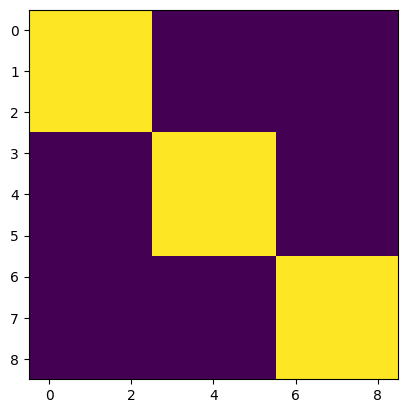

In [17]:
plt.imshow(J_matrix)

# Eigenvalues and eigenvectors for $\bf{J'}$ with $J_{ii}$ set to $0$

In [18]:
w_prime, v_prime = np.linalg.eig(J_matrix_hollowed)

In [19]:
w_prime

array([-0.333, 0.667, -0.333, -0.333, 0.667, -0.333, -0.333, 0.667,
       -0.333])

In [20]:
v_prime

array([[-0.816, 0.577, -0.128, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.408, 0.577, -0.634, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.408, 0.577, 0.762, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, -0.816, 0.577, -0.128, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.408, 0.577, -0.634, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.408, 0.577, 0.762, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, -0.816, 0.577, -0.099],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.408, 0.577, -0.652],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.408, 0.577, 0.751]])

In [21]:
J_matrix_hollowed @ xi_1 

array([0.667, 0.667, 0.667, -0.667, -0.667, -0.667, -0.667, -0.667,
       -0.667])

In [22]:
J_matrix_hollowed @ xi_2

array([-0.667, -0.667, -0.667, 0.667, 0.667, 0.667, -0.667, -0.667,
       -0.667])

In [23]:
J_matrix_hollowed @ xi_3

array([-0.667, -0.667, -0.667, -0.667, -0.667, -0.667, 0.667, 0.667,
       0.667])

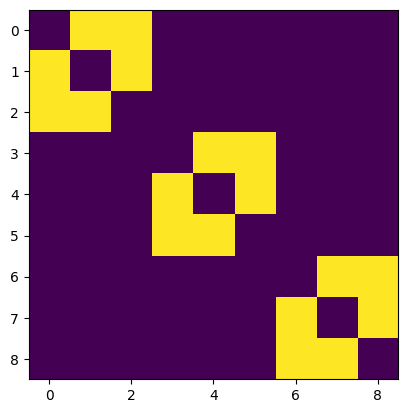

In [24]:
plt.imshow(J_matrix_hollowed)